<a href="https://colab.research.google.com/github/sagarpatiler/machine_learning/blob/main/diamond_price_pred_pyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.7 MB/s 
     |████████████████████████████████| 2.0 MB 60.1 MB/s 
     |████████████████████████████████| 10.4 MB 41.6 MB/s 
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 1.7 MB 39.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 84.0 MB/s 
     |████████████████████████████████| 1.3 MB 48.5 MB/s 
     |████████████████████████████████| 3.3 MB 35.9 MB/s 
     |████████████████████████████████| 137 kB 48.8 MB/s 
     |████████████████████████████████| 268 kB 44.1 MB/s 
     |████████████████████████████████| 16.9 MB 40.6 MB/s 
     |████████████████████████████████| 167 kB 58.1 MB/s 
     |██████████████████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
dataset=get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
dataset.shape

(6000, 8)

In [ ]:
data=dataset.sample(frac=0.9)
data_unseen=dataset.drop(data.index)

In [ ]:
data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

In [ ]:
from pycaret.regression import *


In [ ]:
exp=setup(data=data,target='Price')

,Description,Value
0,session_id,2479
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best=compare_models(exclude=['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,747.3857,2.564446e+06,1538.7007,0.9744,0.0796,0.0594,1.329
rf,Random Forest Regressor,748.0487,2.734590e+06,1585.1700,0.9727,0.0792,0.0585,1.607
lightgbm,Light Gradient Boosting Machine,722.0168,2.823174e+06,1617.2290,0.9717,0.0754,0.0553,0.143
gbr,Gradient Boosting Regressor,859.5294,2.928191e+06,1659.9034,0.9707,0.0972,0.0736,0.275
dt,Decision Tree Regressor,988.0809,5.116380e+06,2209.8228,0.9481,0.1047,0.0751,0.029
ridge,Ridge Regression,2410.6637,1.423524e+07,3743.7298,0.8583,0.6393,0.2879,0.018
br,Bayesian Ridge,2408.7191,1.423499e+07,3743.7663,0.8583,0.6358,0.2877,0.024
lasso,Lasso Regression,2405.4107,1.426052e+07,3746.3428,0.8580,0.6299,0.2869,0.031
llar,Lasso Least Angle Regression,2349.8977,1.429251e+07,3749.5603,0.8578,0.6626,0.2732,0.023
huber,Huber Regressor,1928.9899,1.906584e+07,4328.5276,0.8110,0.4184,0.1663,0.125


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2479, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
gbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,896.6326,8.403099e+06,2898.8099,0.9180,0.0942,0.0612
1,645.9563,2.482342e+06,1575.5449,0.9753,0.0663,0.0506
2,739.4936,2.428079e+06,1558.2294,0.9771,0.0773,0.0563
3,725.5958,2.424491e+06,1557.0778,0.9698,0.0738,0.0532
4,777.7826,3.297370e+06,1815.8661,0.9704,0.0780,0.0579
5,700.7595,1.964725e+06,1401.6865,0.9790,0.0712,0.0542
6,660.2826,1.762252e+06,1327.4985,0.9817,0.0718,0.0535
7,651.2612,1.424664e+06,1193.5931,0.9841,0.0723,0.0531
8,731.2729,1.973447e+06,1404.7944,0.9836,0.0737,0.0568


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2479, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
gbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2479, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
tuned_gbm=tune_model(gbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,877.3283,6.762185e+06,2600.4201,0.9340,0.0994,0.0667
1,744.9314,2.571057e+06,1603.4516,0.9744,0.0845,0.0608
2,877.0653,3.037087e+06,1742.7240,0.9714,0.0954,0.0692
3,742.4235,1.780126e+06,1334.2135,0.9778,0.0977,0.0620
4,801.6314,2.751286e+06,1658.7001,0.9753,0.0905,0.0652
5,737.9126,1.723546e+06,1312.8390,0.9816,0.0816,0.0615
6,679.9678,1.776597e+06,1332.8906,0.9815,0.0935,0.0623
7,733.5882,1.469179e+06,1212.0971,0.9836,0.0883,0.0668
8,786.7066,1.928860e+06,1388.8339,0.9839,0.0832,0.0632


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:LGBMRegressor(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=290, n_jobs=-1, num_leaves=70, objective=None,
              random_state=2479, reg_alpha=0.7, reg_lambda=0.5, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_gbm

LGBMRegressor(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=290, n_jobs=-1, num_leaves=70, objective=None,
              random_state=2479, reg_alpha=0.7, reg_lambda=0.5, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

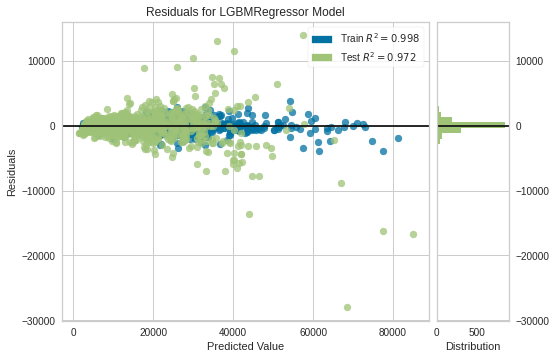

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbm)

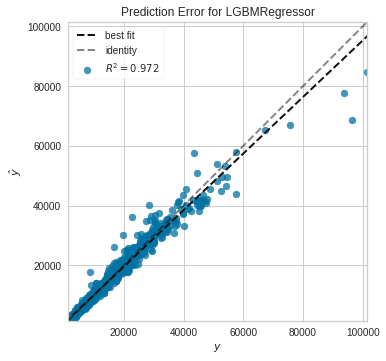

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbm,plot='error')

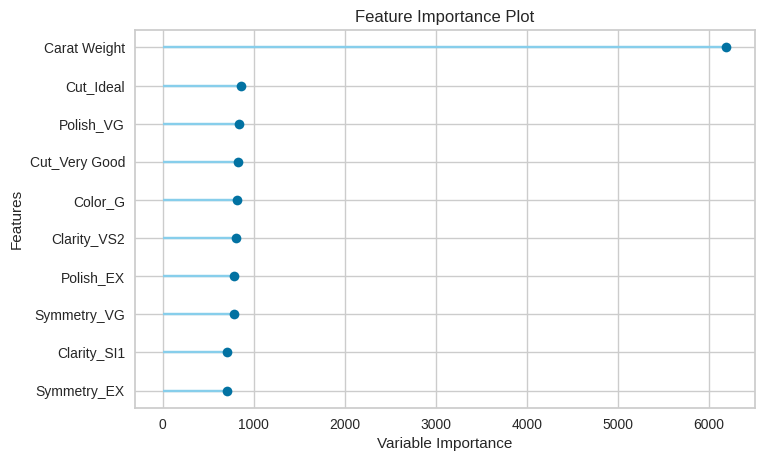

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbm,plot='feature')

In [ ]:
evaluate_model(tuned_gbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=290, n_jobs=-1, num_leaves=70, objective=None,
              random_state=2479, reg_alpha=0.7, reg_lambda=0.5, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_gbm = finalize_model(tuned_gbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=290, n_jobs=-1, num_leaves=70, objective=None,
              random_state=2479, reg_alpha=0.7, reg_lambda=0.5, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(bagging_fraction=0.9, bagging_freq=6, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.2, max_depth=-1,
              min_child_samples=11,